In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import sys
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import scipy.stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [6]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 10})
plt.rc('font', family='serif')

####################################################################################################################################################################################

# [1] Data from Max

####################################################################################################################################################################################

Pileup Mappability (K = 100bp, E = 4 mismatches)

In [7]:
mappability_scores_npz = np.load('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/pickled_files/201027_H37rv_PileupMappability_K100_E4.npz')
mappability_scores_array = mappability_scores_npz['arr_0']

In [8]:
len(mappability_scores_array)

4411532

In [9]:
mappability_scores_array[0:100]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

EBR (36 Isolates)

In [10]:
EBR_36_scores_npz = np.load('/n/data1/hms/dbmi/farhat/mm774/Snakemake_Pipelines/mtb-illumina-wgs-evaluation/Results/B_Extra_UsefulDataFiles/E_EBR_AggregateAndIndividual_Results/210112_EBR_V7_36CI.npz')
EBR_36_scores_array = EBR_36_scores_npz['arr_0']

In [11]:
len(EBR_36_scores_array)

4411532

In [12]:
EBR_36_scores_array[0:100]

array([0.91666667, 0.91666667, 0.91666667, 0.91666667, 0.91666667,
       0.91666667, 0.91666667, 0.91666667, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
       0.94444444, 0.97222222, 0.97222222, 0.97222222, 0.97222222,
       0.97222222, 0.97222222, 0.97222222, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

####################################################################################################################################################################################

# [2] Load in Homoplasy Scores from *SNPPar* for SNPs

####################################################################################################################################################################################

In [13]:
#load in SNPs
all_homoplasic_SNPs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/SNP homoplasies from SNPPar/homoplasy_count_across_lineages.pkl')

In [14]:
all_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,320,67,77,53,25,0,0,552,gyrA,844


In [15]:
np.shape(all_homoplasic_SNPs)

(834981, 20)

Note - SNPs & INDELs with homoplasy score $ = 0$ were dropped from DataFrames

#### mark *mmpR* (Rv0678)  & *glpK* (Rv3696c) as an Antibiotic Resistance gene

In [16]:
all_homoplasic_SNPs.loc[all_homoplasic_SNPs['gene_id'] == 'Rv0678', 'gene_category'] = 'Antibiotic Resistance'
all_homoplasic_SNPs.loc[all_homoplasic_SNPs['gene_id'] == 'Rv0678', 'gene_name'] = 'mmpR'

all_homoplasic_SNPs.loc[all_homoplasic_SNPs['gene_id'] == 'Rv3696c', 'gene_category'] = 'Antibiotic Resistance'

### create a table of SNVs for Max to check Illumina & PacBio for

In [8]:
# sort by highest Hs
homoplasic_SNPs_max = all_homoplasic_SNPs.sort_values(by='total',ascending=False)

In [9]:
homoplasic_SNPs_max.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,202,62,111,114,87,5,3,752,Rv1482c_fabG1,2660
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102


get table of top SNVs in genes: esxL, esxO, esxN, esxM, esxW, PPE18, PPE19, PPE59, PPE60

In [11]:
genes_to_check = ['Rv1198','Rv2346c','Rv1793','Rv1792','Rv3620c','Rv1196','Rv1361c','Rv3429','Rv3478']
genes_to_check_filter = np.array([(gene_i in genes_to_check) for gene_i in homoplasic_SNPs_max.gene_id])
homoplasic_SNPs_max = homoplasic_SNPs_max[genes_to_check_filter]

In [14]:
homoplasic_SNPs_max.shape

(1265, 20)

In [17]:
homoplasic_SNPs_max.head(n=20)

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
28,1339399.0,C,T,T,Rv1196,51,PE/PPE,S,Y17Y,23,39,17,67,72,1,3,4,226,PPE18,2416
31,1341120.0,A,G,G,Rv1198,115,Antigen,N,S39G,33,17,31,35,56,42,2,2,218,esxL,1419
33,1340500.0,G,T,T,Rv1196,1152,PE/PPE,N,M384I,17,26,4,40,73,45,0,1,206,PPE18,3226
36,1341099.0,A,G,G,Rv1198,94,Antigen,N,I32V,27,21,25,30,52,34,2,3,194,esxL,1099
37,1533625.0,G,A,A,Rv1361c,9,PE/PPE,S,D3D,25,22,19,27,43,47,0,0,183,PPE19,562
38,1341114.0,A,G,G,Rv1198,109,Antigen,N,T37A,27,15,27,31,47,30,2,2,181,esxL,1155
49,1339741.0,C,G,G,Rv1196,393,PE/PPE,S,T131T,16,32,22,5,78,7,0,1,161,PPE18,3033
50,1341254.0,G,A,A,Rv1198,249,Antigen,S,A83A,11,16,13,31,43,46,0,0,160,esxL,995
51,2626011.0,G,A,A,Rv2346c,162,Antigen,S,I54I,33,1,14,30,41,38,0,2,159,esxO,7878
53,1533208.0,C,G,G,Rv1361c,426,PE/PPE,S,G142G,27,20,0,9,47,48,2,2,155,PPE19,2580


cut down to top 20 Hs SNVs

In [18]:
homoplasic_SNPs_max = homoplasic_SNPs_max.head(n=20)

In [24]:
homoplasic_SNPs_max = homoplasic_SNPs_max.astype({"pos":int})

In [25]:
homoplasic_SNPs_max

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
28,1339399,C,T,T,Rv1196,51,PE/PPE,S,Y17Y,23,39,17,67,72,1,3,4,226,PPE18,2416
31,1341120,A,G,G,Rv1198,115,Antigen,N,S39G,33,17,31,35,56,42,2,2,218,esxL,1419
33,1340500,G,T,T,Rv1196,1152,PE/PPE,N,M384I,17,26,4,40,73,45,0,1,206,PPE18,3226
36,1341099,A,G,G,Rv1198,94,Antigen,N,I32V,27,21,25,30,52,34,2,3,194,esxL,1099
37,1533625,G,A,A,Rv1361c,9,PE/PPE,S,D3D,25,22,19,27,43,47,0,0,183,PPE19,562
38,1341114,A,G,G,Rv1198,109,Antigen,N,T37A,27,15,27,31,47,30,2,2,181,esxL,1155
49,1339741,C,G,G,Rv1196,393,PE/PPE,S,T131T,16,32,22,5,78,7,0,1,161,PPE18,3033
50,1341254,G,A,A,Rv1198,249,Antigen,S,A83A,11,16,13,31,43,46,0,0,160,esxL,995
51,2626011,G,A,A,Rv2346c,162,Antigen,S,I54I,33,1,14,30,41,38,0,2,159,esxO,7878
53,1533208,C,G,G,Rv1361c,426,PE/PPE,S,G142G,27,20,0,9,47,48,2,2,155,PPE19,2580


export as CSV

In [26]:
homoplasic_SNPs_max.to_csv('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplastic_SNVs_for_Max.csv')

####################################################################################################################################################################################

# [3] Get mappability and EBR scores for H37Rv positions corresponding to top 30 SNVs

####################################################################################################################################################################################

In [17]:
all_homoplasic_SNPs.sort_values(by='total',ascending=False).head(n=10)

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,202,62,111,114,87,5,3,752,Rv1482c_fabG1,2660
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102
5,1473246.0,A,G,G,Rvnr01,1401,None,R,None,5,331,32,71,68,53,0,0,560,rrs,1452
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,320,67,77,53,25,0,0,552,gyrA,844
7,4247431.0,G,A,A,Rv3795,918,Antibiotic Resistance,N,M306I,18,183,77,86,100,63,5,4,536,embB,1208
8,3883626.0,A,G,G,Rv3466,102,Non-Essential,S,P34P,0,123,59,49,143,25,6,0,405,Rv3466,9033
9,3884906.0,A,G,A,Rv3467,943,Non-Essential,N,E315K,72,31,0,44,151,94,0,1,393,Rv3467,6211


#### Analyze only the top 30 SNVs

In [18]:
top_30_homoplasic_SNPs = all_homoplasic_SNPs.sort_values(by='total',ascending=False).head(n=30)

In [19]:
top_30_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,202,62,111,114,87,5,3,752,Rv1482c_fabG1,2660
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102


#### Get mappability & EBR scores for each H37Rv position correspond to the top 30 SNVs

In [29]:
mappability_scores_list = []
EBR_scores_list = []

# iterate through each SNV position and get mappbility & EBR scores
for H37Rv_pos_i in top_30_homoplasic_SNPs.pos:
    
    H37Rv_pos_i = int(H37Rv_pos_i)
    
    mappability_scores_list.append(round(mappability_scores_array[H37Rv_pos_i],3))
    EBR_scores_list.append(round(EBR_36_scores_array[H37Rv_pos_i],3))
    
# append to dataframe
top_30_homoplasic_SNPs.loc[:,'Mappability Score'] = mappability_scores_list
top_30_homoplasic_SNPs.loc[:,'EBR Score'] = EBR_scores_list

In [30]:
top_30_homoplasic_SNPs

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,...,4A,4B,4C,5,6,total,gene_name,num_isolates_alt,Mappability Score,EBR Score
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,...,306,310,179,8,6,1717,katG,8066,1.000,1.000
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,...,222,311,173,8,3,1406,rpoB,5706,1.000,1.000
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,...,65,53,51,6,2,779,rpsL,3509,1.000,1.000
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,...,111,114,87,5,3,752,Rv1482c_fabG1,2660,1.000,1.000
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,...,76,99,60,2,1,743,embB,2102,1.000,1.000
5,1473246.0,A,G,G,Rvnr01,1401,None,R,None,5,...,71,68,53,0,0,560,rrs,1452,1.000,1.000
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,...,77,53,25,0,0,552,gyrA,844,1.000,1.000
7,4247431.0,G,A,A,Rv3795,918,Antibiotic Resistance,N,M306I,18,...,86,100,63,5,4,536,embB,1208,1.000,1.000
8,3883626.0,A,G,G,Rv3466,102,Non-Essential,S,P34P,0,...,49,143,25,6,0,405,Rv3466,9033,0.595,1.000
9,3884906.0,A,G,A,Rv3467,943,Non-Essential,N,E315K,72,...,44,151,94,0,1,393,Rv3467,6211,0.900,1.000


Save as an excel file

In [31]:
top_30_homoplasic_SNPs.to_excel('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/top_30_SNVs_mappability_EBR.xlsx')

####################################################################################################################################################################################

# [4] plot *mappability* and *EBR* for genes for top 30 SNVs

####################################################################################################################################################################################

In [14]:
all_homoplasic_SNPs.sort_values(by='total',ascending=False).head(n=10)

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,202,62,111,114,87,5,3,752,Rv1482c_fabG1,2660
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102
5,1473246.0,A,G,G,Rvnr01,1401,None,R,None,5,331,32,71,68,53,0,0,560,rrs,1452
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,320,67,77,53,25,0,0,552,gyrA,844
7,4247431.0,G,A,A,Rv3795,918,Antibiotic Resistance,N,M306I,18,183,77,86,100,63,5,4,536,embB,1208
8,3883626.0,A,G,G,Rv3466,102,Non-Essential,S,P34P,0,123,59,49,143,25,6,0,405,Rv3466,9033
9,3884906.0,A,G,A,Rv3467,943,Non-Essential,N,E315K,72,31,0,44,151,94,0,1,393,Rv3467,6211


#### Analyze only the top 30 SNVs

In [15]:
top_30_homoplasic_SNPs = all_homoplasic_SNPs.sort_values(by='total',ascending=False).head(n=30)

In [16]:
top_30_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,202,62,111,114,87,5,3,752,Rv1482c_fabG1,2660
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102


Load Reference Genome annotation to get Start/End coordinates on H37Rv

In [5]:
reference_genome_annotation = pd.read_csv('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/H37Rv/h37rv_genome_summary.txt', '\t').set_index('name')

Define function to return **mappability** and **EBR** scores given an gene or intergenic region

In [18]:
def get_mappability_and_EBR(gene_id):
    # get H37Rv start & end coordinates for genomic region
    if '_' not in gene_id: # intragenic region

        H37Rv_start = reference_genome_annotation.loc[gene_id,'chromStart']
        H37Rv_end = reference_genome_annotation.loc[gene_id,'chromEnd']

    if '_' in gene_id: # intergenic region

        gene_A = gene_id.split('_')[0]
        gene_B = gene_id.split('_')[1]

        H37Rv_start = reference_genome_annotation.loc[gene_A,'chromEnd']
        H37Rv_end = reference_genome_annotation.loc[gene_B,'chromStart'] - 1

    # get array for H37Rv coordinates
    H37Rv_coords = np.arange(H37Rv_start+1, H37Rv_end+1)

    # pull array for mappability
    mappability_scores = mappability_scores_array[H37Rv_start:H37Rv_end]

    # pull array for EBR
    EBR_scores = EBR_36_scores_array[H37Rv_start:H37Rv_end]
    
    return [H37Rv_coords, mappability_scores, EBR_scores]

Define function to plot **mappability** and **EBR** score for a given gene or intergenic region

In [21]:
def plot_mappability_and_EBR(gene_id):
    
    # get coords, mappability & EBR array for this gene or intergenic region
    coords, mappability, EBR = get_mappability_and_EBR(gene_id)

    fig, ax = plt.subplots(2)

    ax[0].set_title(top_30_homoplasic_SNPs[top_30_homoplasic_SNPs.gene_id == gene_id].gene_name.values[0])

    ax[0].plot(coords, EBR, color = 'black', alpha = 1.0, linewidth = 1.5)
    ax[0].set_ylim([0,1.05])
    ax[0].set_ylabel('EBR Score', color='black')
    ax[0].tick_params(axis='x', colors='black')
    ax[0].tick_params(axis='y', colors='black')


    ax[1].plot(coords, mappability, color = 'black', alpha = 1.0, linewidth = 1.5)
    ax[1].set_ylim([0,1.05])
    ax[1].set_xlabel('H37Rv coordinate', color='black')
    ax[1].set_ylabel('Mappability Score', color='black')
    ax[1].tick_params(axis='x', colors='black')
    ax[1].tick_params(axis='y', colors='black')

    variant_pos_list = list(top_30_homoplasic_SNPs[top_30_homoplasic_SNPs.gene_id == gene_id].pos)
    for var_pos in variant_pos_list:
        ax[0].axvline(x=var_pos, color='red', linewidth=1.25)
        ax[1].axvline(x=var_pos, color='red', linewidth=1.25)

    fig = plt.gcf()
    fig.set_size_inches(7.0, 6.0)
    fig.tight_layout()
    
    file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/SNV_mappabillity_EBR_plots/' + gene_id + '_mappability_EBR_plot.png'
    plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)
    
    plt.show()

In [22]:
list(set(top_30_homoplasic_SNPs.gene_id))

['Rv2176_Rv2177c',
 'Rv2828c_Rv2829c',
 'Rv0095c',
 'Rv3343c',
 'Rv3795',
 'Rv1196',
 'Rv0980c_Rv0981',
 'Rv1040c_Rv1041c',
 'Rv0006',
 'Rv2347c_Rv2348c',
 'Rv0978c_Rv0979c',
 'Rv1148c',
 'Rv1908c',
 'Rv1872c',
 'Rv1482c_Rv1483',
 'Rv3467',
 'Rv3466',
 'Rv0515',
 'Rv0682',
 'Rv0667',
 'Rv0336',
 'Rvnr01']

#### create plots for genes & intergenic regions that have at least 1 SNV in top 30 hits

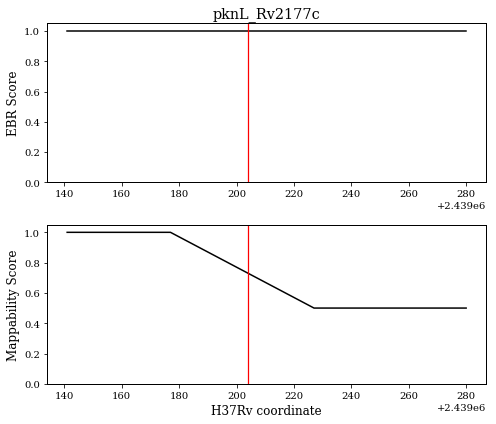

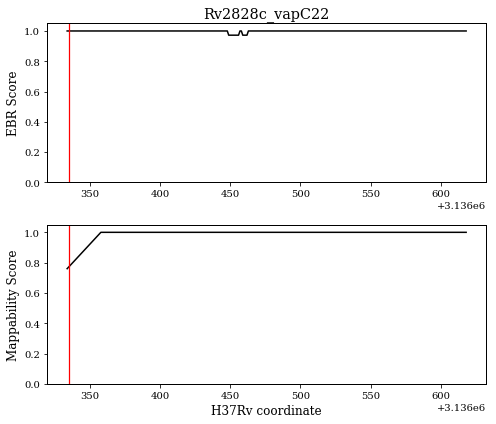

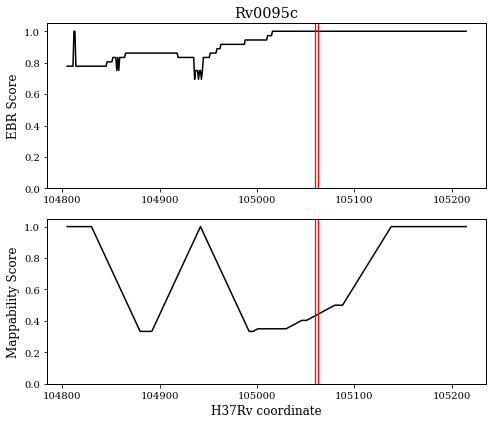

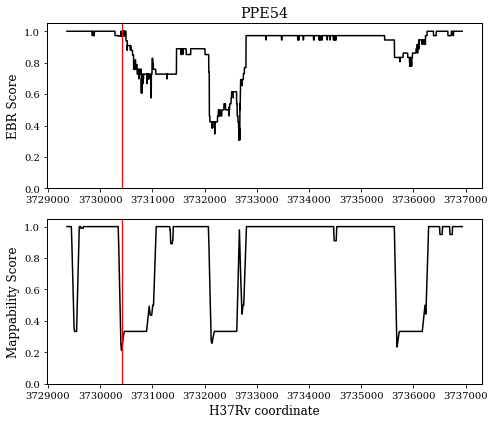

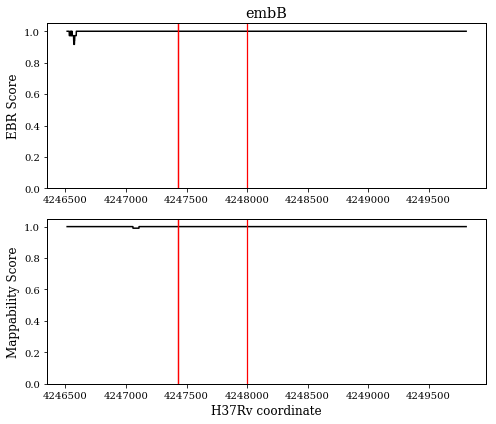

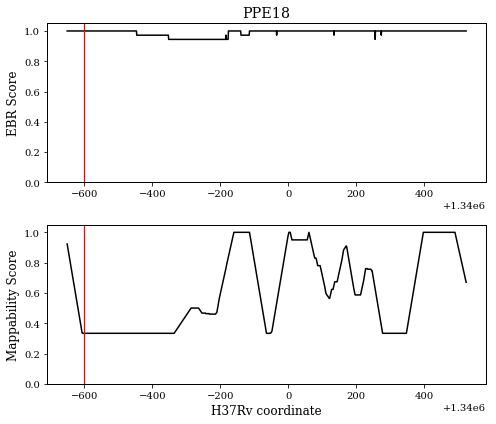

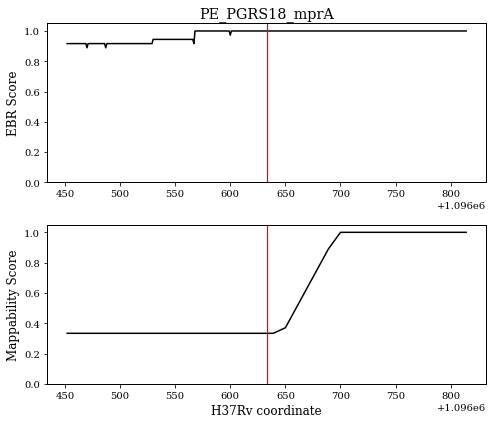

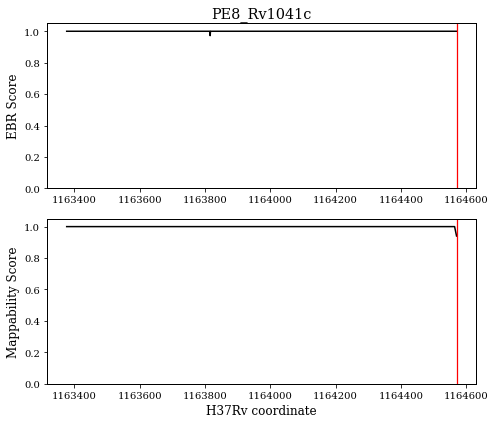

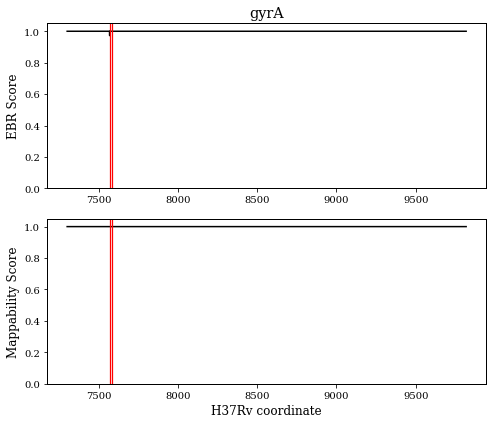

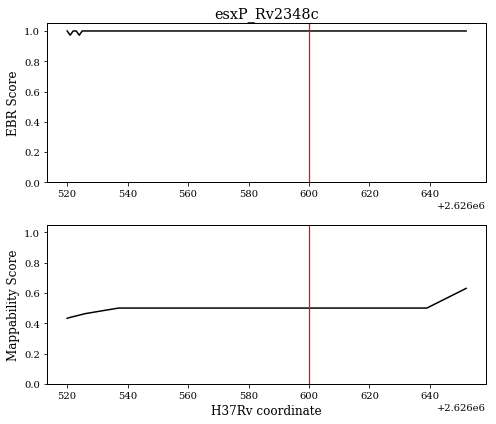

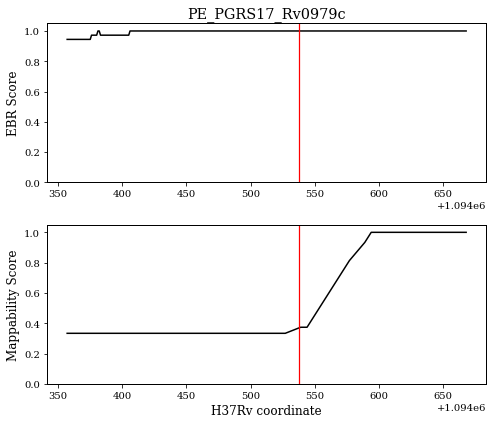

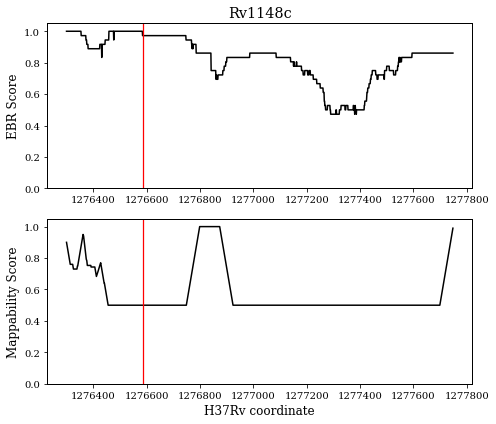

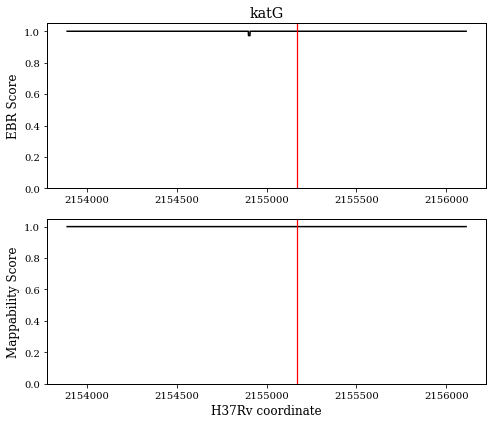

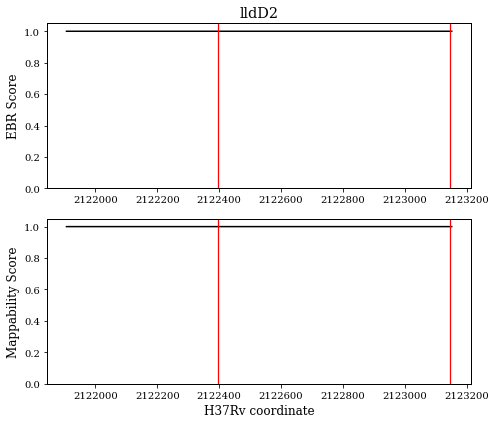

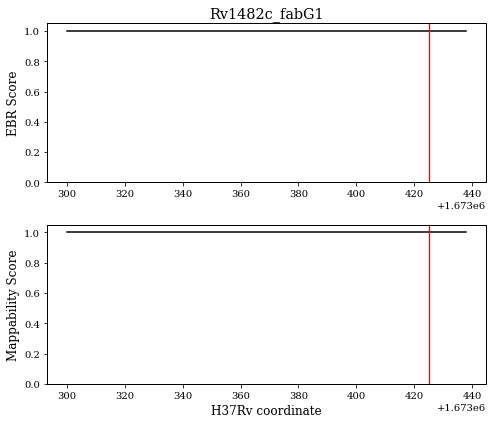

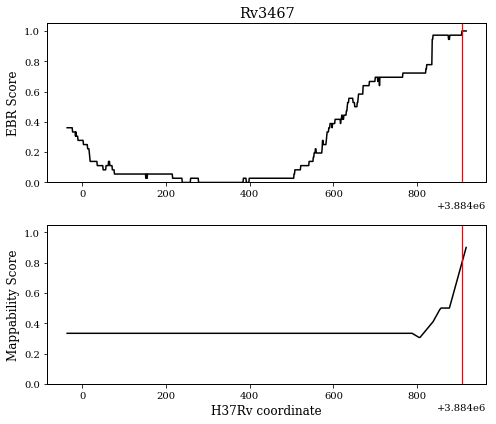

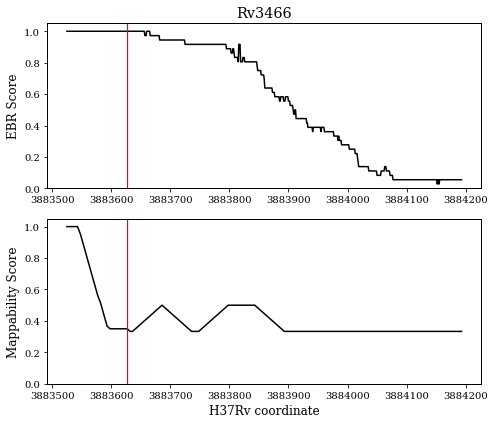

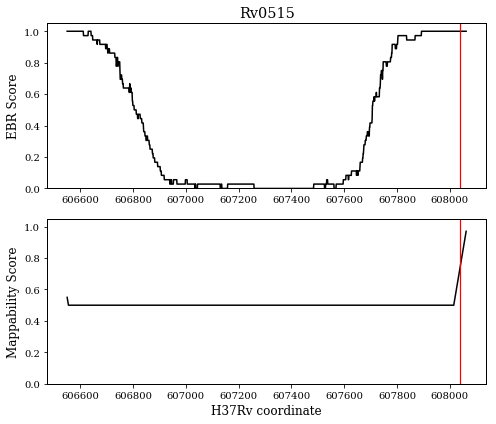

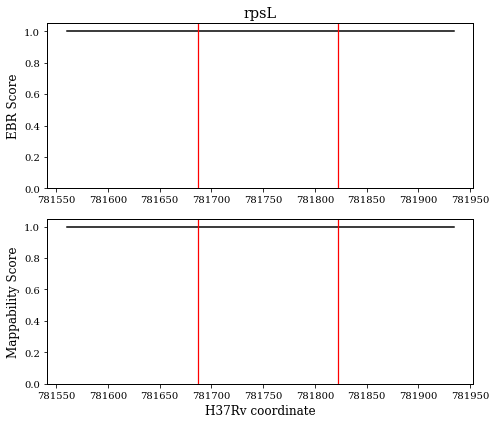

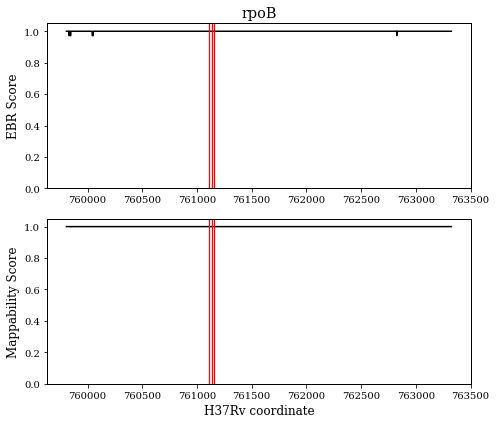

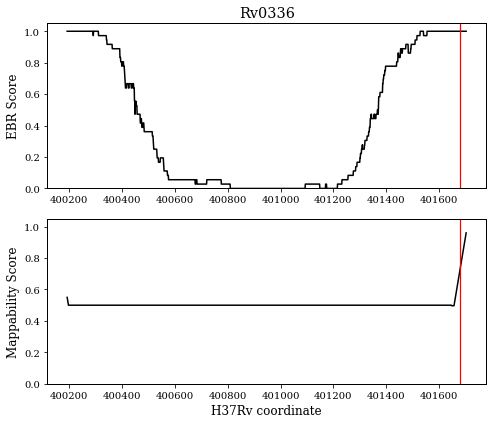

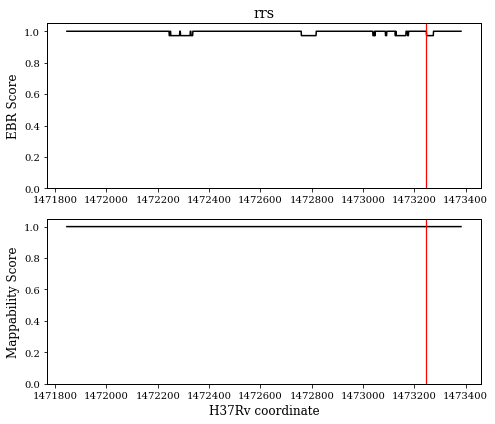

In [23]:
for gene_id in list(set(top_30_homoplasic_SNPs.gene_id)):
    
    plot_mappability_and_EBR(gene_id)